In [1]:
import numpy as np
import pandas as pd

# Step 1
Load the scikit-learn version of the diabetes dataset and use the load_diabetes function.

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

See the data of DESCR.

In [3]:
print(diabetes.DESCR)
#print(diabetes['data'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

# Step 2
Split the dataset into the training and test sets by using the function train_test_split in scikit-learn. <p>
Here random_state is set my birthday.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'],diabetes['target'], random_state=2209)

# Step 3
Below is the training and test R2 for the Lasso model with the default parameters. 

In [5]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2209).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
lasso.coef_

Training set score: 0.36
Test set score: 0.37
Number of features used: 2


array([  0.        ,  -0.        , 386.09999602,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       318.17739949,   0.        ])

Question1:<p>
Training set score: 0.32,
Test set score: 0.33

Question2:<p> 
The coefficients remain the 2, and it means those including two features.

Question3:<p> 
We can see the attribute of DESCR that shows by order and compare the array of lasso.coed_.<p>
Attributes:Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6<p> 
The name of features are "Body mass index" and "S5".

# Step 4 
I loaded the original dataset of diabetes from the web page and used the np.loadtxt about dtype=str then cut the header (first) row.<p>
Second, I transform the type from str to float before I split the data and target.

In [6]:
load_diabetes = np.loadtxt(fname="C:/Users/USER/diabetes.data",dtype='str')
load_diabetes = load_diabetes[1:,:]
load_diabetes = load_diabetes.astype(np.float)
XX = load_diabetes[:,:-1]
yy = load_diabetes[:,-1:]

# Step 5
I split the dataset into the training and test sets by using the function train_test_split in scikit-learn. <p>
And the random_state is set the 2209.

In [7]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy, random_state=2209)
print("X_train: ",XX_train.shape)
print("X_test: ",XX_test.shape)
print("y_train: ",yy_train.shape)
print("y_test: ",yy_test.shape)

X_train:  (331, 10)
X_test:  (111, 10)
y_train:  (331, 1)
y_test:  (111, 1)


# Step 6
Repeat Step 3 for the original dataset.

In [8]:
lasso = Lasso(random_state=2209).fit(XX_train, yy_train)

In [9]:
print("Training set score: {:.2f}".format(lasso.score(XX_train, yy_train)))
print("Test set score: {:.2f}".format(lasso.score(XX_test, yy_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.53
Test set score: 0.43
Number of features used: 8


Although it use the default parameter for alpha, we can still see its number of features used which is 8. <p> 
Because the original data didn't do the normalisation, the prediction result is not correct. The data should subtract mean and divide by std.

# Step 7
Preprocess the training and test sets in the same way by using StandardScaler().

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

load_diabetes = np.loadtxt(fname="C:/Users/USER/diabetes.data",dtype='str')
load_diabetes = load_diabetes[1:,:]
load_diabetes = load_diabetes.astype(np.float)

# I do the normalisation by StandardScaler() for all the original data including the data and target.
# Then I divide the original data into data (Scaler_Xsc) and target (Scaler_ysc).
scaler = StandardScaler()
Scaler_load_diabetes = scaler.fit_transform(load_diabetes) 
Scaler_Xsc = Scaler_load_diabetes[:,:-1]
Scaler_ysc = Scaler_load_diabetes[:,-1:]                                

Xsc_train, Xsc_test, ysc_train, ysc_test = train_test_split(Scaler_Xsc,Scaler_ysc, random_state=2209)

# Step 8

In [32]:
from sklearn.linear_model import Lasso
Sclasso = Lasso(random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(Sclasso.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(Sclasso.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(Sclasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In this part, I want to describe more detail about what I try the results. As I couldn't get the same scale of data, I spent a lot of time to find the reasons for the StandardScale(). After I only used the StandardScale() for X_train and X_test of original data and then the array values are different with the data from sklearn. First, we know that the StandardScale() is (X-mean)/(standard deviation), and I use the respective function to compute then the scale is between 10^-2 and 10^-1; however, if we use the StandardScale() for the X data which show the scale between 10^-1 and 10^0.
```
Xsc = load_diabetes[:,:-1]
Scaler_ysc = Scaler_load_diabetes[:,-1:]
Scaler_ysc = load_diabetes[:,-1:]
Scaler_Xsc = (Xsc - np.mean(Xsc)) / np.std(Xsc)
```
Furthermore, the result which only using the StandardScale() on X train and X test is wrong, because the coefficient numbers should shrink close to zero at alpha=1. The value of number of features used is bigger at alpha=1, and if we increase the alpha, the number of features used can't still sharply decrease. In my opinion, I think that the situation is more similar to Ridge regression. <p> 
Sequentially, I changed the way that doing the StandardScale() for all data including the X data and Y data, after the step was loading the original data.(i.e. Step7)
```
scaler = StandardScaler()
Scaler_load_diabetes = scaler.fit_transform(load_diabetes) 
Scaler_Xsc = Scaler_load_diabetes[:,:-1]
Scaler_ysc = Scaler_load_diabetes[:,-1:]   
```
We can notice that the new value of number of features used is more normal than value of previous way. In the default parameter of alpha=1, the number of features used can be 0. 

# Step 9 
In this step, I used the different alpha parameters in the Lasso, and plot the test R2 vs the number of features used.

## alpha=0.01

In [12]:
lasso001 = Lasso(alpha=0.01,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso001.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso001.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
lasso001.coef_

Training set score: 0.54
Test set score: 0.42
Number of features used: 9


array([-0.01036117, -0.19463279,  0.32543035,  0.19858646, -0.08370899,
       -0.        , -0.13641493,  0.0062725 ,  0.35905022,  0.0183304 ])

## alpha=0.001

In [13]:
lasso0001 = Lasso(alpha=0.001,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso0001.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso0001.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))
lasso0001.coef_

Training set score: 0.54
Test set score: 0.41
Number of features used: 10


array([-0.02299423, -0.21518025,  0.32462825,  0.21510158, -0.43468459,
        0.2567307 ,  0.0170406 ,  0.07704454,  0.47972704,  0.02505472])

## alpha=0.1

In [14]:
lasso01 = Lasso(alpha=0.1,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso01.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso01.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))
lasso01.coef_

Training set score: 0.49
Test set score: 0.46
Number of features used: 5


array([-0.        , -0.03944713,  0.30976222,  0.10734754, -0.        ,
       -0.        , -0.05896764,  0.        ,  0.28447255,  0.        ])

## alpha=0.55

In [15]:
lasso055 = Lasso(alpha=0.55,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso055.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso055.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso055.coef_ != 0)))
lasso055.coef_

Training set score: 0.06
Test set score: 0.05
Number of features used: 1


array([ 0.        , -0.        ,  0.04921435,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])

## alpha=0.5

In [16]:
lasso05 = Lasso(alpha=0.5,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso05.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso05.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso05.coef_ != 0)))
lasso05.coef_

Training set score: 0.12
Test set score: 0.12
Number of features used: 2


array([ 0.        , -0.        ,  0.08659468,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.02796178,  0.        ])

## alpha=0.2

In [17]:
lasso02 = Lasso(alpha=0.2,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso02.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso02.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso02.coef_ != 0)))
lasso02.coef_

Training set score: 0.42
Test set score: 0.42
Number of features used: 3


array([ 0.        , -0.        ,  0.27694174,  0.03935842,  0.        ,
        0.        , -0.        ,  0.        ,  0.23947988,  0.        ])

## alpha=0.05

In [18]:
lasso005 = Lasso(alpha=0.05,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso005.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso005.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso005.coef_ != 0)))
lasso005.coef_

Training set score: 0.52
Test set score: 0.45
Number of features used: 6


array([-0.        , -0.1282557 ,  0.31392643,  0.15786137, -0.        ,
       -0.00187181, -0.1214413 ,  0.        ,  0.30438111,  0.        ])

## alpha=0.03

In [19]:
lasso003 = Lasso(alpha=0.03,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso003.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso003.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso003.coef_ != 0)))
lasso003.coef_

Training set score: 0.53
Test set score: 0.44
Number of features used: 7


array([-0.        , -0.16139804,  0.32017444,  0.1785554 , -0.04057944,
       -0.        , -0.13200144,  0.        ,  0.33389872,  0.00108197])

## alpha=0.015

In [20]:
lasso0015 = Lasso(alpha=0.015,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso0015.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso0015.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso0015.coef_ != 0)))
lasso0015.coef_

Training set score: 0.54
Test set score: 0.43
Number of features used: 8


array([-0.00361313, -0.18664006,  0.3238213 ,  0.19267387, -0.07061239,
       -0.        , -0.13917783,  0.        ,  0.35276204,  0.01356185])

## alpha=2

In [21]:
lasso2 = Lasso(alpha=2,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso2.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso2.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso2.coef_ != 0)))
lasso2.coef_

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


array([ 0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.])

## alpha=0.15

In [22]:
lasso015 = Lasso(alpha=0.15,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso015.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso015.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso015.coef_ != 0)))
lasso015.coef_

Training set score: 0.45
Test set score: 0.45
Number of features used: 4


array([ 0.        , -0.        ,  0.29824698,  0.0685637 , -0.        ,
       -0.        , -0.01555222,  0.        ,  0.26405987,  0.        ])

In [44]:
print("α=0.001 Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))
print("α=0.01 Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
print("α=0.015 Number of features used: {}".format(np.sum(lasso0015.coef_ != 0)))
print("α=0.03 Number of features used: {}".format(np.sum(lasso003.coef_ != 0)))
print("α=0.05 Number of features used: {}".format(np.sum(lasso005.coef_ != 0)))
print("α=0.1 Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))
print("α=0.15 Number of features used: {}".format(np.sum(lasso015.coef_ != 0)))
print("α=0.2 Number of features used: {}".format(np.sum(lasso02.coef_ != 0)))
print("α=0.5 Number of features used: {}".format(np.sum(lasso05.coef_ != 0)))
print("α=0.55 Number of features used: {}".format(np.sum(lasso055.coef_ != 0)))
print("α=1 Number of features used: {}".format(np.sum(Sclasso.coef_ != 0)))
print("α=2 Number of features used: {}".format(np.sum(lasso2.coef_ != 0)))

α=0.001 Number of features used: 10
α=0.01 Number of features used: 9
α=0.015 Number of features used: 8
α=0.03 Number of features used: 7
α=0.05 Number of features used: 6
α=0.1 Number of features used: 5
α=0.15 Number of features used: 4
α=0.2 Number of features used: 3
α=0.5 Number of features used: 2
α=0.55 Number of features used: 1
α=1 Number of features used: 0
α=2 Number of features used: 0


Alpha | Number  
:----:|:-----:
1 | 0 
0.55 | 1
0.5|2
0.2|3
0.15|4
0.1|5
0.05|6
0.03|7
0.015|8
0.01|9
0.001|10

Text(0,0.5,'Test R^2 score')

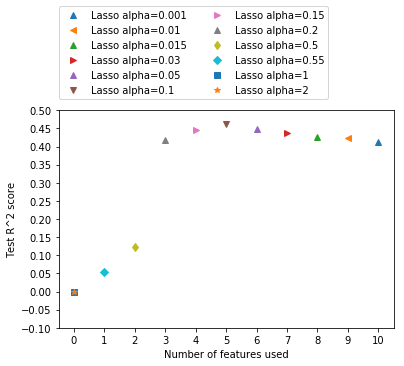

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline   
plt.plot(np.sum(lasso0001.coef_ != 0),lasso0001.score(Xsc_test, ysc_test), '^', label="Lasso alpha=0.001")
plt.plot(np.sum(lasso001.coef_ != 0),lasso001.score(Xsc_test, ysc_test), '<', label="Lasso alpha=0.01")
plt.plot(np.sum(lasso0015.coef_ != 0),lasso0015.score(Xsc_test, ysc_test), '^', label="Lasso alpha=0.015")
plt.plot(np.sum(lasso003.coef_ != 0),lasso003.score(Xsc_test, ysc_test), '>', label="Lasso alpha=0.03")
plt.plot(np.sum(lasso005.coef_ != 0),lasso005.score(Xsc_test, ysc_test), '^', label="Lasso alpha=0.05")
plt.plot(np.sum(lasso01.coef_ != 0),lasso01.score(Xsc_test, ysc_test), 'v', label="Lasso alpha=0.1")
plt.plot(np.sum(lasso015.coef_ != 0),lasso015.score(Xsc_test, ysc_test), '>', label="Lasso alpha=0.15")
plt.plot(np.sum(lasso02.coef_ != 0),lasso02.score(Xsc_test, ysc_test), '^',label="Lasso alpha=0.2")
plt.plot(np.sum(lasso05.coef_ != 0),lasso05.score(Xsc_test, ysc_test), 'd', label="Lasso alpha=0.5")
plt.plot(np.sum(lasso055.coef_ != 0),lasso055.score(Xsc_test, ysc_test), 'D', label="Lasso alpha=0.55")
plt.plot(np.sum(Sclasso.coef_ != 0),Sclasso.score(Xsc_test, ysc_test), 's', label="Lasso alpha=1")
plt.plot(np.sum(lasso2.coef_ != 0),lasso2.score(Xsc_test, ysc_test), '*', label="Lasso alpha=2")


plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
my_y_ticks=np.arange(-0.1, 0.51, 0.05)
plt.yticks(my_y_ticks)
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("Number of features used")
plt.ylabel("Test R^2 score")


I prefer the point which is at alpha = 0.1, because we can see the point at alpha=0.1 which has the highest score. Second, the numbers of features used are underfitting between 0 and 2. Although decreasing features can help us to analyze the data, too few features will make us infer errors. On the other hand, the numbers of features used are overfitting between 7 and 10. According to the plot, after alpha=0.1, the curve decrease steadily obviously. In conclusion, the numbers of features used at the alpha=0.1 can get the highest score that it is reasonable.

# Step 10
I use the different alpha parameters for the Lasso by using cross-validation on the training set. After CV got the best value of alpha, we took this value the training set and did the test score. 

In [25]:
from sklearn.model_selection import cross_val_score
col = 0
Avalue = 0
step = 0
alphaNP=np.arange(0.001, 1, 0.001)
for i in alphaNP:
    lasso = Lasso(alpha=i,max_iter=10000,random_state=2209,tol=0.0001)
    scores = cross_val_score(lasso,X_train,y_train,cv=5)
    score = round(np.mean(scores),7)
    step += 1
    if col < score :
        col = score
        Avalue = i
print("Best Alpha:", Avalue)
print("Best mean(scores):", col)
lasso = Lasso(alpha=Avalue,max_iter=100000,random_state=2209).fit(Xsc_train, ysc_train)
print("Training set score: {:.2f}".format(lasso.score(Xsc_train, ysc_train)))
print("Test set score: {:.2f}".format(lasso.score(Xsc_test, ysc_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Best Alpha: 0.077
Best mean(scores): 0.5057245
Training set score: 0.50
Test set score: 0.46
Number of features used: 5


In the previous step, we can see the result which alpha=0.1 is the highest score and the range is quite high score between 0.15 and 0.05. It can help us judge that the range of the highest score will probably fall there. After using CV, we can get the best alpha 0.077 and it is close to 0.1. The best number of features used is also 5 as same as 0.1.

# Step 11
(a)

In [57]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy, random_state=2209)
X_training_proper, X_calibration, y_training_proper, y_calibration = train_test_split(XX_train,yy_train, test_size=99, random_state=2209)

(b)

In [58]:
scaler = StandardScaler()
Scaler_X_test = scaler.fit_transform(XX_test) 
Scaler_X_training_proper = scaler.fit_transform(X_training_proper) 
Scaler_X_calibration = scaler.fit_transform(X_calibration) 

(c)

In [60]:
proper_lasso = Lasso(random_state=2209).fit(Scaler_X_training_proper, y_training_proper)
new_prediction = proper_lasso.predict(X_calibration)